# InD dataset

##  Intelligible Pedestrians Destination Prediction with Additive Models 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.cluster import KMeans

import glob,os
%matplotlib inline
import os

# Read data

In [2]:

files_ids = [x for x in range(33)]
root = './indds/'
all_files = []
all_meta_and_statics = []
for x in files_ids:
    idx = '{0:02d}'.format(x)
    meta_info_file = os.path.join(root,f'{idx}_recordingMeta.csv')
    file_ = os.path.join(root,f'{idx}_tracks.csv')
    static_file = os.path.join(root,f'{idx}_tracksMeta.csv')

    meta_info = pd.read_csv(meta_info_file)
    static_ = pd.read_csv(static_file)

    all_files.append(pd.read_csv(file_))
    all_meta_and_statics.append((meta_info,static_))


In [3]:
all_meta_and_statics[30][1]#.loc[:,'trackId']

,recordingId,trackId,initialFrame,finalFrame,numFrames,width,length,class
0,30,0,0,164,165,1.95184,4.83186,car
1,30,1,0,25613,25614,2.07064,4.19739,car
2,30,2,0,25613,25614,2.23145,5.34932,car
3,30,3,0,25613,25614,2.11827,4.75119,car
4,30,4,0,25613,25614,2.07056,4.83091,car
...,...,...,...,...,...,...,...,...
406,30,406,25252,25613,362,0.00000,0.00000,pedestrian
407,30,407,25317,25482,166,1.86074,4.56119,car
408,30,408,25341,25460,120,1.87077,4.89216,car
409,30,409,25415,25571,157,1.88588,4.68807,car


In [4]:
all_types_dict = {}

for id_ in range(33):
    all_types_dict.update({id_:{}})
    for agent_type,rows_ in all_meta_and_statics[id_][1].groupby('class'):
        all_types_dict[id_].update({agent_type:rows_['trackId'].to_numpy()}) 

In [5]:
all_files[30].keys()

Index(['recordingId', 'trackId', 'frame', 'trackLifetime', 'xCenter',
       'yCenter', 'heading', 'width', 'length', 'xVelocity', 'yVelocity',
       'xAcceleration', 'yAcceleration', 'lonVelocity', 'latVelocity',
       'lonAcceleration', 'latAcceleration'],
      dtype='object')

In [23]:
all_files[30]
# add additional three colmouns

,Unnamed: 0,recordingId,trackId,frame,trackLifetime,xCenter,yCenter,heading,width,length,...,lonVelocity,latVelocity,lonAcceleration,latAcceleration,vru_5,nonvru_5,vru_10,nonvru_10,vru_20,nonvru_20
0,0,30,0,0,0,13.81165,-6.57041,325.19666,1.95184,4.83186,...,10.69027,-0.00428,0.10642,0.10001,0,0,0,3,0,4
1,1,30,0,1,1,14.16311,-6.81303,325.36933,1.95184,4.83186,...,10.71663,0.02964,0.06653,0.10817,0,0,0,0,0,0
2,2,30,0,2,2,14.51776,-7.05826,325.52830,1.95184,4.83186,...,10.74033,0.06187,0.00494,0.11813,0,0,0,1,0,2
3,3,30,0,3,3,14.87516,-7.30615,325.67587,1.95184,4.83186,...,10.75936,0.09267,-0.07678,0.12945,0,0,0,2,0,5
4,4,30,0,4,4,15.23415,-7.55628,325.80649,1.95184,4.83186,...,10.77221,0.12068,-0.17612,0.14201,0,1,0,4,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287005,287005,30,410,25609,103,56.53556,-43.11588,322.89039,1.88283,4.02104,...,13.75180,0.05595,-0.21810,0.07890,0,1,0,2,0,5
287006,287006,30,410,25610,104,56.97220,-43.44953,322.78327,1.88283,4.02104,...,13.74286,0.03230,-0.21850,0.07793,1,0,1,0,1,1
287007,287007,30,410,25611,105,57.40950,-43.78221,322.70977,1.88283,4.02104,...,13.73388,0.01705,-0.21867,0.07776,0,0,0,1,0,3
287008,287008,30,410,25612,106,57.84670,-44.11397,322.62479,1.88283,4.02104,...,13.72502,-0.00027,-0.21862,0.07805,1,0,1,0,1,1


# Check collosion + avg speeds

In [23]:
all_files[0].keys()

Index(['recordingId', 'trackId', 'frame', 'trackLifetime', 'xCenter',
       'yCenter', 'heading', 'width', 'length', 'xVelocity', 'yVelocity',
       'xAcceleration', 'yAcceleration', 'lonVelocity', 'latVelocity',
       'lonAcceleration', 'latAcceleration'],
      dtype='object')

In [71]:
all_speeds = [0,0,0]
for csv,trck_type in zip(all_files[30:],[all_types_dict[30],all_types_dict[31],all_types_dict[32]]):
    cars, bikes, peds = [],[],[]
    for t in csv.trackId.to_numpy():
        cars.append(t in list(trck_type['car']))
        bikes.append(t in list(trck_type['bicycle']))
        peds.append(t in list(trck_type['pedestrian']))
    cars = np.array(cars)
    bicycle = np.array(bikes)
    pedestrian = np.array(peds)
    speeds = np.linalg.norm(np.array([csv.xVelocity.to_numpy(),csv.yVelocity.to_numpy()]),axis=0)
    print(speeds[cars].mean())
    print(speeds[bicycle].mean())
    print(speeds[pedestrian].mean())
    all_speeds[0] += speeds[pedestrian].mean()
    all_speeds[1] += speeds[bicycle].mean()
    all_speeds[2] += speeds[cars].mean()
print(np.array(all_speeds)/3)

2.5708606860065406
7.79397425689079
1.2751418570920166
2.3426855890610647
6.730065073378579
1.3925929201143576
2.4857366434534556
4.311886947599534
1.325559319194826
[1.33109803 6.27864209 2.46642764]


In [9]:
a = np.max(all_files[0].trackId.to_numpy())
b = np.max(all_files[0].frame.to_numpy())
np.zeros((a,b))

24027

In [28]:
all_data_mat = []
for id_ in files_ids[30:]:

    vehicles_ids = list(all_types_dict[id_]['car'])
    if 'truck_bus' in all_types_dict[id_].keys():
        vehicles_ids += list(all_types_dict[id_]['truck_bus'])

    proximity = [[] for _ in range(2)]

    a = np.max(all_files[id_].trackId.to_numpy())
    b = np.max(all_files[id_].frame.to_numpy())
    ab = np.zeros((a,b))
    for frame,rows in all_files[id_].groupby('frame'):
        #print(frame)
        # split here to VRU vs Cars
        c_tracks = rows['trackId'].to_numpy()
        non_vrus = np.array(([(x in vehicles_ids) for x  in c_tracks]))
        vrus = np.logical_not(non_vrus)
        #if (vrus.sum()):
        poses = (np.vstack((rows['xCenter'].to_numpy(),rows['yCenter'].to_numpy())).T)
        
        for j,pose in enumerate(poses):
            distances_vrus = np.linalg.norm(poses[vrus]-pose,axis=1)
            distances_nonvrus = np.linalg.norm(poses[non_vrus]-pose,axis=1)
            #print(distances_vrus)
            #print(distances_nonvrus)
            
            proximity[0] = ((distances_vrus<0.5).sum()-vrus[j])
            proximity[1] = ((distances_nonvrus<0.5).sum()-non_vrus[j])
            
            if proximity[0] +  proximity[1]:
                ab[c_tracks[j],frame] = (vrus[j]*1 + non_vrus[j]*2)
                
    
    all_data_mat.append(ab.copy())


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [73]:
sucess_rate = 0
survival_rate = 0
sucess_std = 0
survival_std = 0
for mat in all_data_mat:
    # sucess
    sucess_rate += (np.logical_not(mat >0).all(axis=1).mean())
    sucess_std += (np.logical_not(mat >0).all(axis=1).std())
    # survival
    survival_rate += ((np.cumsum(mat>0,axis=1)==0).sum(axis=1).mean())
    survival_std += ((np.cumsum(mat>0,axis=1)==0).sum(axis=1).std())
    
print(sucess_rate/3)
print(survival_rate/3)

print(sucess_std/3)
print(survival_std/3)

0.995512753410796
25501.46657245542
0.053974064873463325
372.36768837771933


In [50]:
(all_data_mat[0]>0).sum()

50

In [66]:
(np.cumsum(all_data_mat[0]>0,axis=1)==0).sum(axis=1).mean()

25563.951219512193

# Add new data (only done once)

In [44]:
ranges = [5,10,20]
if False:
    for id_ in files_ids[32:]:
        idx = '{0:02d}'.format(id_)
        file_ = os.path.join(root,f'{idx}_tracks.csv')

        vehicles_ids = list(all_types_dict[id_]['car'])
        if 'truck_bus' in all_types_dict[id_].keys():
            vehicles_ids += list(all_types_dict[id_]['truck_bus'])

        proximity = [[] for _ in range(len(ranges)*2)]

        for frame,rows in all_files[id_].groupby('frame'):
            #print(frame)
            # split here to VRU vs Cars
            non_vrus = np.array(([(x in vehicles_ids) for x  in rows['trackId'].to_numpy()]))
            vrus = np.logical_not(non_vrus)
            #if (vrus.sum()):
            poses = (np.vstack((rows['xCenter'].to_numpy(),rows['yCenter'].to_numpy())).T)
            
            for j,pose in enumerate(poses):
                distances_vrus = np.linalg.norm(poses[vrus]-pose,axis=1)
                distances_nonvrus = np.linalg.norm(poses[non_vrus]-pose,axis=1)
                #print(distances_vrus)
                #print(distances_nonvrus)
                
                for jj in range(len(ranges)):
                    proximity[2*jj].append((distances_vrus<ranges[jj]).sum()-vrus[j])
                    proximity[2*jj+1].append((distances_nonvrus<ranges[jj]).sum()-non_vrus[j])

        for i,prox in enumerate(proximity):
            all_files[id_].insert(all_files[id_].shape[1],f'{["","non"][i%2]}vru_{ranges[i//2]}',prox)
            
        all_files[id_].to_csv(file_)
        print(f'file: {file_} is saved')
        

file: ./indds/32_tracks.csv is saved


In [32]:
all_files[1]

,recordingId,trackId,frame,trackLifetime,xCenter,yCenter,heading,width,length,xVelocity,...,lonVelocity,latVelocity,lonAcceleration,latAcceleration,vru_5,nonvru_5,vru_10,nonvru_10,vru_20,nonvru_20
0,1,0,0,0,132.04457,-31.99325,261.76756,1.87348,4.76888,-1.21104,...,8.45598,0.00024,0.33811,0.07776,1,0,1,0,1,0
1,1,0,1,1,131.99811,-32.32607,261.71362,1.87348,4.76888,-1.21586,...,8.48115,-0.00652,0.32596,0.08420,0,1,0,1,0,1
2,1,0,2,2,131.95175,-32.66156,261.66163,1.87348,4.76888,-1.22183,...,8.50615,-0.01185,0.30201,0.09211,0,0,0,0,0,0
3,1,0,3,3,131.90537,-32.99971,261.60869,1.87348,4.76888,-1.22902,...,8.52987,-0.01594,0.26626,0.10052,0,0,0,0,0,0
4,1,0,4,4,131.85674,-33.34127,261.55991,1.87348,4.76888,-1.23661,...,8.55072,-0.01862,0.21959,0.10868,0,1,0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193243,1,384,25803,163,127.82768,-52.71701,248.49337,2.15288,5.00815,-1.41196,...,3.42449,0.16823,0.53915,0.39398,0,0,0,0,0,0
193244,1,384,25804,164,127.77067,-52.84447,248.23404,2.15288,5.00815,-1.43545,...,3.44895,0.16854,0.54379,0.39122,0,1,0,2,0,2
193245,1,384,25805,165,127.71150,-52.97219,247.96729,2.15288,5.00815,-1.45846,...,3.47276,0.16797,0.54680,0.38832,0,1,0,2,0,2
193246,1,384,25806,166,127.65147,-53.10000,247.70221,2.15288,5.00815,-1.48097,...,3.49602,0.16700,0.54888,0.38562,0,0,0,2,0,2


# SDD like split

In [21]:
in_tracks = []
tracks = []
current_type = 'car'
classes_dict = {'pedestrian':0,
                'bicycle':1,
                'car':2,
                'truck_bus':3}
in_ = []
all_tracks = []
samples_in = 0
Xs, Xs_test = [],[]
ys, ys_test = [],[]
trajs_full_len = 0

for i in (files_ids):
    # 8 seconds only and pedestrains 
    useful_tracks = (all_meta_and_statics[i][1]['numFrames']>(25*8))*(all_meta_and_statics[i][1]['class']==current_type)
    in_tracks = all_meta_and_statics[i][1]['trackId'][useful_tracks].to_numpy().tolist()

    ds = all_files[i].groupby('trackId')#['xCenter'].to_numpy()
    #trajs_full_len = int(traj_lens[i]*0.8)
    for track_id, track_rows in ds:
        if track_id in in_tracks:
            track = track_rows.to_dict(orient="list")
            tracks.append(track)
            #add as data point
            in_ = [track["xCenter"], track["yCenter"],track["heading"],track["xVelocity"], track["yVelocity"],
             track["xAcceleration"], track["yAcceleration"], track["width"], track["length"],
             track["vru_5"],track["vru_10"],track["vru_20"],track["nonvru_5"],track["nonvru_10"],track["nonvru_20"]]#,[track_class]*len(track["xCenter"])]
            
            # check if parked car (max movment >0.4m) for all the track
            track_array = np.array(in_).T[::10,:] # 25 equal 1s, then 10 equal 400ms
            if np.linalg.norm(np.diff(np.array(in_).T[:,:2],axis=0),axis=1).max()<0.1:
                continue
            # rotation
            samples_in += 1
            for ii in range(track_array.shape[0]-20):
                X = track_array[(ii):(ii+8),:].copy()#+4
                c, s = np.cos(-1*(X[-1,2]+0)*np.pi/180), np.sin(-1*(X[-1,2]+0)*np.pi/180)
                R_mat = np.array([[c, -s], [s, c]])
                
                out = (track_array[(ii+8):(ii+20),:2] - X[-1:,:2]).copy()
                #out = (track_array[(ii+19):(ii+20),:2] - X[-1:,:2]).copy()
                X[:,:2] -= X[-1:,:2]

                # rotate positions
                X[:,:2] = (R_mat @ X[:,:2].T).T
                
                # ===== speed and acc
                X[:,3:5] = (R_mat @ X[:,3:5].T).T
                X[:,5:7] = (R_mat @ X[:,5:7].T).T
                
                #out[0,:2] = R_mat @ out[0,:2]
                #y = np.array([R_mat @ out_pnt for out_pnt in out]).flatten().copy()
                y = (R_mat @ out.T).T.flatten().copy()
                #y = out.copy()#[:,:2]
                #trajs_full_len -= 1
                if i<30:#trajs_full_len>0:# 80% data
                    Xs.append(X[:,:].flatten())
                    ys.append(y)
                else:
                    Xs_test.append(X[:,:].flatten())
                    ys_test.append(y)

Xs = np.vstack(Xs)
ys = np.vstack(ys)
Xs_test = np.vstack(Xs_test)
ys_test = np.vstack(ys_test)
print(Xs.shape)
print(ys.shape)
print(Xs_test.shape)
print(ys_test.shape)

(71153, 120)
(71153, 24)
(6068, 120)
(6068, 24)


## Format



In [3]:
yx_all = np.hstack((ys,Xs))
yx_test_all = np.hstack((ys_test,Xs_test))
np.save(f'ind_train_{current_type}.npy',yx_all)
np.save(f'ind_test_{current_type}.npy',yx_test_all)

NameError: name 'ys' is not defined

In [68]:
yx_all[:,1].min()

-2.233122937018041

In [62]:
ys.shape

(196123, 24)

# Save or load saved

In [26]:
current_type = 'ped'

In [27]:
if os.path.isfile(f'ind_train_{current_type}.npy'):
    yx_all = np.load(f'ind_train_{current_type}.npy')
    yx_test_all = np.load(f'ind_test_{current_type}.npy')
else:
    np.save(f'ind_train_{current_type}.npy',yx_all)
    np.save(f'ind_test_{current_type}.npy',yx_test_all)


In [28]:
print(yx_all.shape)
print(yx_test_all.shape)

(196123, 144)
(2821, 144)


# Clustrize features



In [114]:
use_kmeans = True
if use_kmeans:
    modes_n = 20
    smoothed_pnts = np.unique(np.round(yx_all[:,:2],2),axis=0)
    clusterer = KMeans(n_clusters=modes_n,random_state=42).fit(smoothed_pnts)#,n_init=10
    clusterer_labels_ = clusterer.predict(yx_all[:,:2])

In [6]:
clusterer.labels_[:,None]#predict(yx_all[:10,22:24])

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [36]:
i_ = 150
next_12x = yx_all[i_,:24:2]
next_12y = yx_all[i_,1:24:2]
first_8x = yx_all[i_,24::15]
first_8y = yx_all[i_,25::15]
x0_ = np.hstack((first_8x,next_12x))
y0_ = np.hstack((first_8y,next_12y))

In [115]:
first_8x = yx_all[:,24::15]
next_12x = yx_all[:,:24:2]
first_8y = yx_all[:,25::15]
next_12y = yx_all[:,1:24:2]

x0_ = np.hstack((first_8x,next_12x))
y0_ = np.hstack((first_8y,next_12y))

In [116]:
dxy0_ = np.dstack((np.diff(x0_),np.diff(y0_)))
r0 = np.linalg.norm(dxy0_,axis=2)

In [117]:
dxy00_ = np.vstack((np.diff(x0_[0]),np.diff(y0_[0])))
r00 = np.linalg.norm(dxy00_,axis=0)

In [118]:

theta0 = np.arctan2(dxy0_[:,:,1],dxy0_[:,:,0])
difftheta0 = np.diff(theta0,axis=1)

rx,ry = np.cos(difftheta0)*r0[:,1:],np.sin(difftheta0)*r0[:,1:]


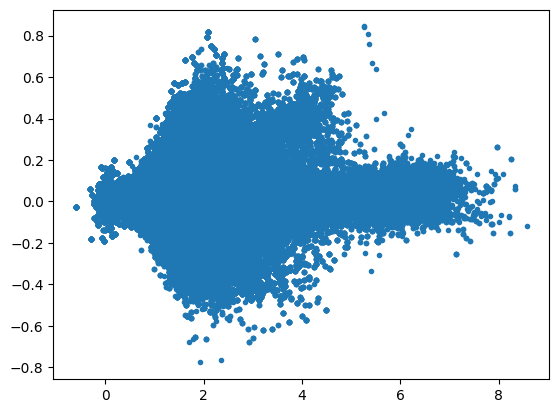

In [119]:
rxy = np.vstack((rx.flatten(),ry.flatten())).T

plt.scatter(rxy[:,0],rxy[:,1],marker='.')
#plt.axis([0,0.25,0,5])
plt.show()

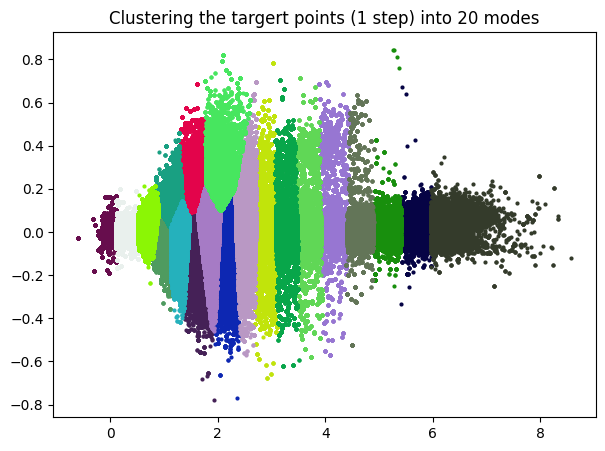

In [121]:
use_kmeans = True
if False:
    modes_n = 20
    smoothed_pnts = np.unique(np.round(rxy[:,:2],2),axis=0)
    clusterer = KMeans(n_clusters=modes_n,random_state=42).fit(smoothed_pnts)#,n_init=10

clusterer_labels_ = clusterer.predict(rxy[:,:2])

sub_modes = []
colors = []
if use_kmeans:
    plt.figure(figsize=(7,5))
    for i in range(modes_n):
        cluster_i = (clusterer_labels_==i)
        sub_modes.append(rxy[cluster_i])
        color = np.array([[np.random.rand() for _  in range(3)]])
        colors.append(color)
        plt.scatter(rxy[cluster_i][:,0],rxy[cluster_i][:,1],c=color,marker='.',linewidths=0.001)
    plt.title(f'Clustering the targert points (1 step) into {modes_n} modes')

    plt.show()

In [102]:
rxy_ = np.dstack((rx,ry))
all_l = clusterer.predict(rxy_.reshape(-1,2)).reshape(rxy_.shape[0],-1)

In [110]:
all_l.shape

random_modes = np.random.randint(0,modes_n,all_l.shape).reshape(all_l.shape)

19

In [111]:
random_modes[0]

array([ 8,  0,  6, 15, 13,  9,  7, 11, 17, 12,  5,  5,  1, 19, 12, 10,  1,
        6])

In [105]:
all_l0

array([12,  5, 10,  0, 11, 17, 17, 11,  0,  0, 10,  5, 12, 12,  2,  6, 19,
       19], dtype=int32)

In [95]:

all_l0 = clusterer.predict(rxy_[0,:,:].reshape(-1,2))

In [89]:
rxy__ = rxy_.reshape(-1,2)

In [92]:
(rxy__.reshape(rxy_.shape) == rxy_).all()

True

In [52]:

dxy0_ = np.dstack((np.diff(x0_),np.diff(y0_)))
r0 = np.linalg.norm(dxy0_,axis=0)
theta0 = np.arctan2(dxy0_[:,:,1],dxy0_[:,:,0])

theta00 = (np.pi/2)-theta0




(71153, 20)

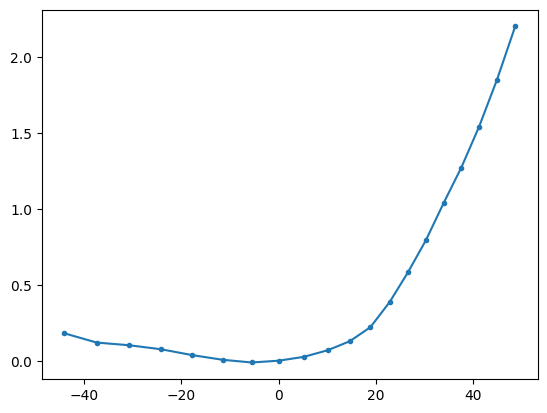

In [37]:
plt.plot(np.hstack((first_8x,next_12x)),np.hstack((first_8y,next_12y)),marker='.')
plt.show()

In [38]:
dxy0_ = np.vstack((np.diff(x0_),np.diff(y0_)))
r0 = np.linalg.norm(dxy0_,axis=0)
theta0 = np.arctan2(dxy0_[1],dxy0_[0])

theta00 = (np.pi/2)-theta0

theta000 = theta0[1:] + theta00[:-1]

rx,ry = np.cos(theta000)*r0[1:],np.sin(theta000)*r0[1:]

In [39]:
theta0

array([-0.0091698 , -0.00262582, -0.00402602, -0.00601282, -0.00491778,
       -0.00296373,  0.00211487,  0.00490637,  0.00887724,  0.01312293,
        0.02183867,  0.04176305,  0.05197767,  0.05725217,  0.06717023,
        0.06424651,  0.07361289,  0.08390785,  0.09356362])

In [40]:
np.diff(theta0)

array([ 0.00654398, -0.00140019, -0.0019868 ,  0.00109504,  0.00195405,
        0.0050786 ,  0.00279151,  0.00397086,  0.00424569,  0.00871574,
        0.01992437,  0.01021463,  0.0052745 ,  0.00991806, -0.00292373,
        0.00936638,  0.01029496,  0.00965577])

In [41]:

rx,ry = np.cos(np.diff(theta0))*r0[1:],np.sin(np.diff(theta0))*r0[1:]

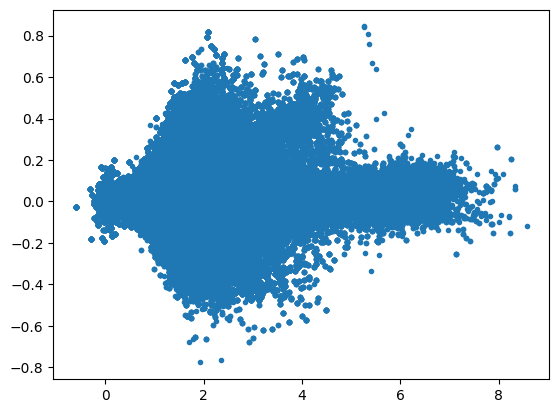

In [74]:
plt.scatter(rx.flatten(),ry.flatten(),marker='.')
#plt.axis([0,0.25,0,5])
plt.show()

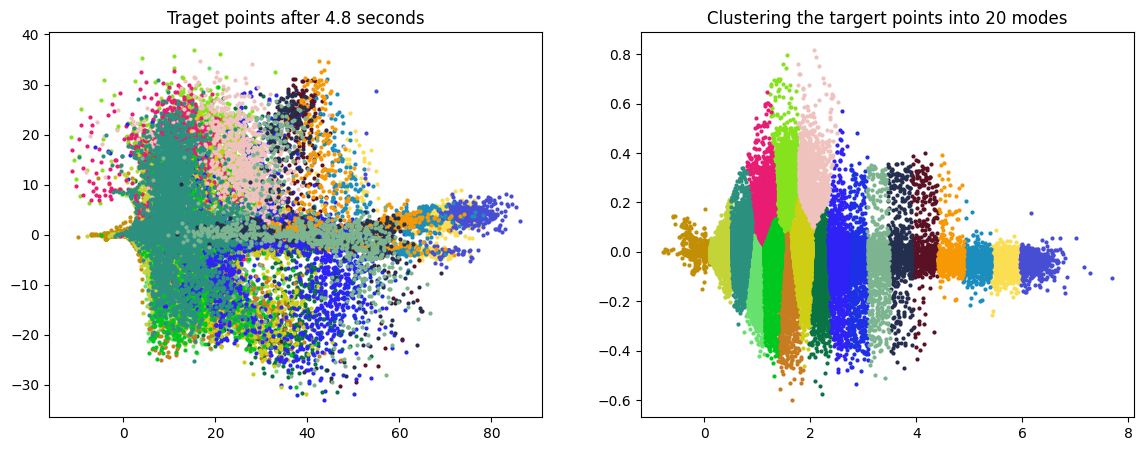

In [6]:
sub_modes = []
colors = []
if use_kmeans:
    plt.figure(figsize=(14,5))
    plt.subplot(122)
    for i in range(modes_n):
        cluster_i = (clusterer_labels_==i)
        sub_modes.append(yx_all[cluster_i])
        color = np.array([[np.random.rand() for _  in range(3)]])
        colors.append(color)
        plt.scatter(yx_all[cluster_i][:,0],yx_all[cluster_i][:,1],c=color,marker='.',linewidths=0.001)
    plt.title(f'Clustering the targert points into {modes_n} modes')
    plt.subplot(121)
    for i in range(modes_n):
        cluster_i = (clusterer_labels_==i)
        sub_modes.append(yx_all[cluster_i])
        plt.scatter(yx_all[cluster_i][:,22],yx_all[cluster_i][:,23],c=colors[i],marker='.',linewidths=0.001)
    #plt.scatter(yx_all[:,22],yx_all[:,23],marker='.',linewidths=0.001)
    plt.title('Traget points after 4.8 seconds')
    plt.show()

Text(0.5, 1.0, 'Traget points after 4.8 seconds')

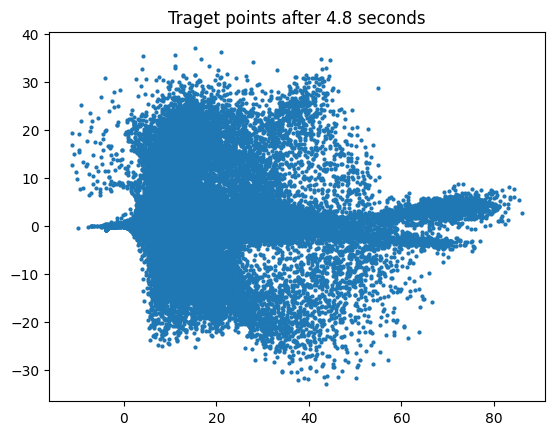

In [6]:
plt.scatter(yx_all[:,22],yx_all[:,23],marker='.',linewidths=0.001)
plt.title('Traget points after 4.8 seconds')